In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.options.display.max_columns = None

In [17]:
df_aves_15 = pd.read_csv("data/avistamientos/vis_2015.csv")
df_aves_16 = pd.read_csv("data/avistamientos/vis_2016.csv")
df_aves_17 = pd.read_csv("data/avistamientos/vis_2017.csv")
df_aves_18 = pd.read_csv("data/avistamientos/vis_2018.csv")
df_aves_19 = pd.read_csv("data/avistamientos/vis_2019.csv")
df_aves_20 = pd.read_csv("data/avistamientos/vis_2020.csv")
df_aves_21 = pd.read_csv("data/avistamientos/vis_2021.csv")
df_aves_22 = pd.read_csv("data/avistamientos/vis_2022.csv")

In [72]:
# Agrupar los avistamientos por locName, para obtener el número de avistamientos por localidad en 2020 y el tipo de ave 
df_aves_localida = df_aves_20.groupby(['locName', 'comName']).size().reset_index(name='counts')
df_aves_localida = df_aves_localida.sort_values(by=['counts'], ascending=False)
df_aves_localida = df_aves_localida.reset_index(drop=True)
df_aves_localida


,locName,comName,counts
0,Quebrada El Arrayán--La Villa,White-banded Mockingbird,51
1,Cerro Los Piques,Gray-hooded Sierra Finch,19
2,SN Humedal Río Maipo--Desembocadura,Ticking Doradito,19
3,Río Lluta--Desembocadura,White-cheeked Pintail,18
4,SN Humedal Angachilla--Puente Angachilla,Common Gallinule,17
...,...,...,...
1745,Estero Catapilco--Desembocadura (Laguna Zapallar),Patagonian Sierra Finch,1
1746,Estero Cartagena--Desembocadura (Humedal Urbano),White-faced Ibis,1
1747,Estero Cartagena--Desembocadura (Humedal Urbano),South American Tern,1
1748,Estero Cartagena--Desembocadura (Humedal Urbano),Common Tern,1


In [ ]:
# 

In [44]:
df_aves_15.sort_values(by="howMany", ascending=False).head(10)
df_aves_16.sort_values(by="howMany", ascending=False).head(10)
df_aves_17.sort_values(by="howMany", ascending=False).head(10)
df_aves_18.sort_values(by="howMany", ascending=False).head(10)
df_aves_19.sort_values(by="howMany", ascending=False).head(10)
df_aves_20.sort_values(by="howMany", ascending=False).head(10)
df_aves_21.sort_values(by="howMany", ascending=False).head(10)
df_aves_22.sort_values(by="howMany", ascending=False).head(10)


,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
3097,impcor1,Imperial Cormorant,Leucocarbo atriceps,L3438732,MN Los Pingüinos--Isla Magdalena,2022-11-11,50000.0,-52.920237,-70.575957,False,-1,Magallanes
534,sooshe,Sooty Shearwater,Ardenna grisea,L947356,Moncul,2022-02-21,30000.0,-38.746787,-73.436394,False,-1,Araucanía
84,redkno,Red Knot,Calidris canutus,L18473398,SN Bahía Lomas--Desembocadura Río Side,2022-01-09,14073.0,-52.682552,-69.184681,False,-1,Magallanes
2242,maspet,Markham's Storm-Petrel,Hydrobates markhami,L16872547,Quebrada de Vitor--Mirador,2022-08-25,8000.0,-18.748319,-70.337648,False,-1,Arica y Parinacota
498,sooshe,Sooty Shearwater,Ardenna grisea,L17797457,Bay Talcahuano,2022-02-18,8000.0,-36.675372,-73.034720,True,-1,Bío-Bío
3135,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L19352319,Islas Cullintos,2022-11-13,7000.0,-36.786346,-73.219790,False,-1,Bío-Bío
243,whrsan,White-rumped Sandpiper,Calidris fuscicollis,L8481103,Acceso Pepita,2022-01-27,3500.0,-52.477308,-69.389010,True,-1,Magallanes
3645,sander,Sanderling,Calidris alba,L21938859,"A-210, Arica, Arica y Parinacota, CL (-18,421,...",2022-12-27,3000.0,-18.421091,-70.319230,True,-1,Arica y Parinacota
3069,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L931512,"Tolten, Nigue norte",2022-11-08,3000.0,-39.298904,-73.229198,False,-1,Araucanía
3271,hudgod,Hudsonian Godwit,Limosa haemastica,L10674205,Estero Rulo,2022-11-25,2800.0,-41.701408,-73.094813,False,-1,Los Lagos


In [59]:
# Agruparemos df_aves_20, por obsDT, para ver por mes la cantidad de avistamientos de aves en total, por lo tanto sumaremos la columna howMany para cada mes y lo guardaremos en un nuevo dataframe llamado df_aves_20_mes
df_aves_20_mes = df_aves_20.groupby("obsDt").sum()
df_aves_20_mes = df_aves_20_mes.reset_index()
df_aves_20_mes = df_aves_20_mes[["obsDt", "howMany"]]
df_aves_20_mes = df_aves_20_mes.rename(columns={"obsDt": "mes", "howMany": "cantidad"})
df_aves_20_mes["mes"] = pd.to_datetime(df_aves_20_mes["mes"])
df_aves_20_mes["mes"] = df_aves_20_mes["mes"].dt.month
df_aves_20_mes = df_aves_20_mes.groupby("mes").sum()
df_aves_20_mes = df_aves_20_mes.reset_index()
df_aves_20_mes



,mes,cantidad
0,1,29676.0
1,2,53634.0
2,3,23539.0
3,4,17841.0
4,5,5718.0
5,6,24892.0
6,7,17326.0
7,8,4181.0
8,9,19681.0
9,10,15704.0


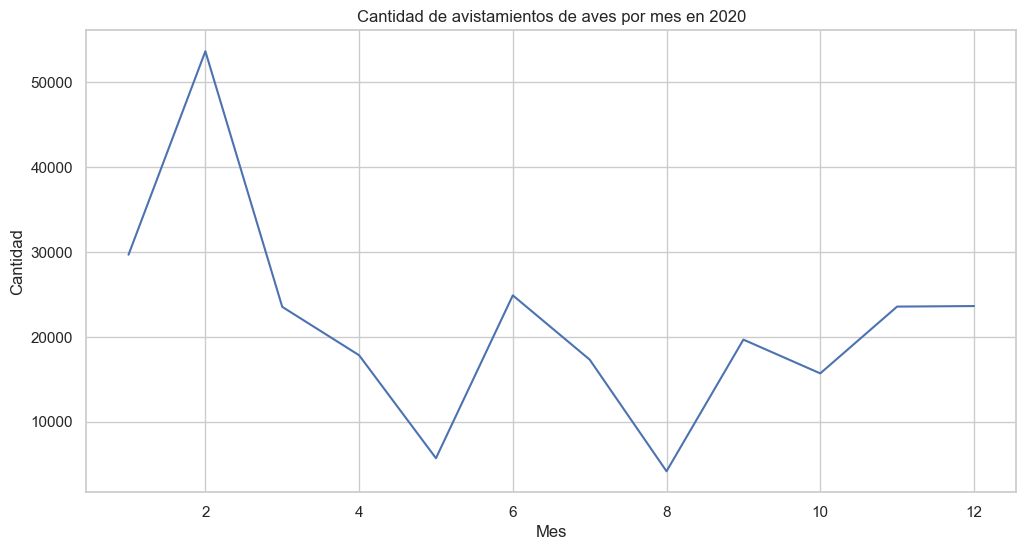

In [65]:
# Graficaremos df_aves_20_mes, por cada mes, con mes 1,2,3,4,5,6,7,8,9,10,11,12 con lineplot 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_aves_20_mes, x="mes", y="cantidad")
plt.title("Cantidad de avistamientos de aves por mes en 2020")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.show()




In [19]:
df_aves_19.dtypes

speciesCode         object
comName             object
sciName             object
locId               object
locName             object
obsDt               object
howMany            float64
lat                float64
lng                float64
locationPrivate       bool
exoticCategory       int64
region              object
dtype: object

In [27]:
df_aves_18.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory
120,Franklin's Gull,27110.0,-1373.296933,-2902.989420,6,-40
276,Sanderling,23810.0,-1335.867178,-2788.682585,7,-39
183,Magellanic Penguin,17500.0,-105.767341,-141.155949,0,-2
155,Hudsonian Godwit,15575.0,-903.689783,-1581.483717,9,-22
244,Red Knot,13593.0,-938.263785,-1632.006249,6,-23
...,...,...,...,...,...,...
241,Purple Gallinule,1.0,-18.480749,-70.309153,0,-1
248,Red-crested Cardinal,1.0,-33.452642,-70.542303,1,1
299,Solitary Sandpiper,1.0,-18.416539,-70.322408,0,-1
205,Oasis Hummingbird,0.0,-32.870771,-70.587534,1,-1


In [28]:
df_aves_19.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)


,comName,howMany,lat,lng,locationPrivate,exoticCategory
305,Sooty Shearwater,30900.0,-145.841363,-215.594767,3,-3
157,Guanay Cormorant,24007.0,-192.646573,-429.987735,1,-6
283,Sanderling,11540.0,-798.587163,-1716.283294,3,-24
297,Slender-billed Parakeet,10519.0,-506.630941,-943.740630,8,-13
228,Peruvian Booby,6934.0,-144.942511,-289.701008,0,-4
...,...,...,...,...,...,...
139,Gray-breasted Martin,1.0,-18.216103,-69.301457,0,-1
0,African Black Duck,1.0,-36.827802,-73.038011,0,1
341,Vermilion Flycatcher,0.0,-18.828150,-70.136249,1,-1
82,Chilean Mockingbird,0.0,-33.426346,-70.805287,1,-1


In [40]:
# Sumaremos toda la columna de howmany para obtener el total de avistamientes en general
df_aves_19["howMany"].sum()


204732.0

In [37]:

df_aves_20.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)



,comName,howMany,lat,lng,locationPrivate,exoticCategory
290,Sooty Shearwater,83000.0,-261.124492,-433.935753,4,-6
148,Guanay Cormorant,25028.0,-527.181828,-1085.561893,4,-15
268,Sanderling,10162.0,-1051.772146,-2216.834155,4,-31
156,Hudsonian Godwit,9157.0,-1137.672651,-2020.841857,7,-28
284,Snowy Egret,8361.0,-237.636381,-437.218130,6,-6
...,...,...,...,...,...,...
96,Cordilleran Canastero,1.0,-35.954761,-70.573684,0,-1
252,Rose-ringed Parakeet,1.0,-33.087369,-71.379381,1,1
251,Ringed Warbling Finch,1.0,-41.408339,-73.182644,1,-1
248,Ring-necked Pheasant,1.0,-41.877618,-73.995944,0,0


In [41]:
df_aves_20["howMany"].sum()



262509.0

In [29]:
df_aves_21.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory
244,Sanderling,25309.0,-834.214836,-1785.805968,2,-25
174,Markham's Storm-Petrel,15082.0,-96.275779,-350.884308,4,-5
137,Guanay Cormorant,10301.0,-601.148881,-1161.700667,6,-16
22,Austral Parakeet,10000.0,-39.648704,-73.151665,1,-1
146,Hudsonian Godwit,9105.0,-1483.973661,-2817.603801,10,-39
...,...,...,...,...,...,...
106,Eastern Rosella,1.0,-33.599847,-70.618291,1,1
267,Sooty Tern,1.0,-27.135174,-109.421479,1,-1
302,Westland Petrel,1.0,-54.442895,-69.133530,1,-1
29,Barn Owl,1.0,-33.570899,-70.635695,0,-1


In [42]:
df_aves_21["howMany"].sum()



180199.0

In [23]:
df_aves_22.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory
156,Imperial Cormorant,50000.0,-52.920237,-70.575957,0,-1
295,Sooty Shearwater,38000.0,-75.422159,-146.471114,1,-2
270,Sanderling,26933.0,-1324.194522,-2859.180170,4,-40
146,Guanay Cormorant,19742.0,-814.264118,-1525.711592,2,-21
238,Red Knot,15699.0,-1867.488343,-3719.283377,8,-52
...,...,...,...,...,...,...
313,Straight-billed Earthcreeper,1.0,-33.356413,-70.249082,0,-1
322,Tawny-headed Swallow,1.0,-32.884417,-71.506748,0,-1
328,Tropical Kingbird,1.0,-23.698630,-70.413313,1,-1
375,Zebra Finch,1.0,-33.490079,-70.738535,1,2


In [43]:
df_aves_22["howMany"].sum()


266404.0

In [51]:
# Queremos graficar la columna howMany de cada dataframe para ver la evolución de los avistamientos de aves en los últimos años en Chile 
# Para esto, crearemos un nuevo dataframe que contenga la suma de la columna howMany de cada dataframe de avistamientos
df_aves_cantidad = pd.DataFrame(columns=["year", "howMany"])
df_aves_cantidad["year"] = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df_aves_cantidad["howMany"] = [df_aves_15["howMany"].sum(), df_aves_16["howMany"].sum(), df_aves_17["howMany"].sum(), df_aves_18["howMany"].sum(), df_aves_19["howMany"].sum(), df_aves_20["howMany"].sum(), df_aves_21["howMany"].sum(), df_aves_22["howMany"].sum()]


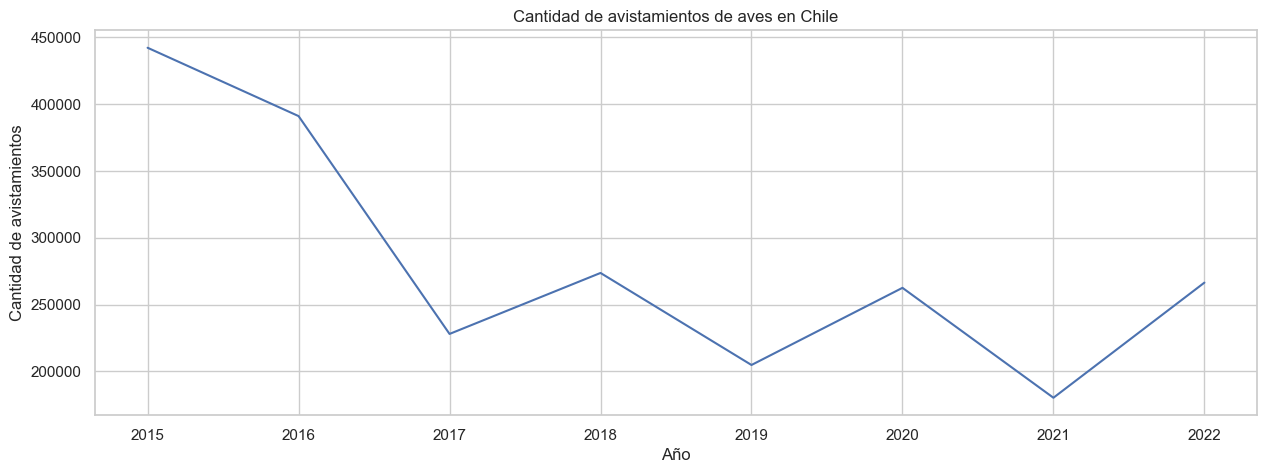

In [53]:
# Graficaremos grid
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_aves_cantidad, x="year", y="howMany")
plt.title("Cantidad de avistamientos de aves en Chile")
plt.xlabel("Año")
plt.ylabel("Cantidad de avistamientos")
plt.show()
